In [1]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 450kB 47.2MB/s 
     |████████████████████████████████| 3.8MB 55.2MB/s 
     |████████████████████████████████| 81kB 13.7MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [0]:
import tensorflow as tf
tf.compat.v1.is_tensor

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# path = r'D:\ImagesofCoffeeBean' # change directory accordingly
train_data_dir = "/content/drive/My Drive/ImagesofCoffeeBean/Training"
test_data_dir = "/content/drive/My Drive/ImagesofCoffeeBean/Testing"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
        validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [7]:
class_list = ['Robusta Cherry (Black)','Robusta cherry (Broken)','Robusta Cherry (Brown )','Robusta Cherry (old or past )','Robusta Cherry (Shells)','Robusta Cherry(Foreign Matter)','Robusta Cherry(Insect damage)','Robustry cherry (Green)']
train_batches = train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(224,224), 
                                                  classes= class_list,
                                                  batch_size =16,
                                                  subset='training',shuffle = True)
test_batches = test_datagen.flow_from_directory(test_data_dir, 
                                                target_size=(224,224), 
                                                classes= class_list,
                                                batch_size=16,shuffle = False)
validation_batches = train_datagen.flow_from_directory(train_data_dir, 
                                                       target_size=(224,224),
                                                       classes=class_list,
                                                       batch_size =16,
                                                       subset='validation',shuffle = True)

Found 2147 images belonging to 8 classes.
Found 302 images belonging to 8 classes.
Found 532 images belonging to 8 classes.


In [0]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=(5,5), activation="relu", input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(5,5),strides=(2,2)))
model.add(Conv2D(32, kernel_size=(5,5), activation="relu"))
model.add(Conv2D(32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(5,5),strides=(2,2)))
model.add(Conv2D(16, kernel_size=(5,5), activation="relu"))
model.add(Conv2D(16, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(5,5),strides=(2,2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))
# model.add(Conv2D(256, kernel_size=3, activation="relu"))
# model.add(Conv2D(256, kernel_size=3, activation="relu"))
# model.add(MaxPool2D(pool_size=(5,5),strides=(2,2)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(16, activation='relu'))
# # model.add(Dense(32, activation='relu'))
# # model.add(Dense(16, activation='relu'))
# # model.add(Dense(4, activation='relu'))
# model.add(Dense(2, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 64)      4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 216, 64)      102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 106, 106, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 102, 102, 32)      51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 43, 43, 16)        1

In [0]:
# imgs, labels = next(train_batches)

In [0]:
# def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if (ims.shape[-1] != 3):
#             ims = ims.transpose((0,2,3,1))
#     f = plt.figure(figsize=figsize)
#     cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     for i in range(len(ims)):
#         sp = f.add_subplot(rows, cols, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(titles[i], fontsize=16)
#         plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
# imgs1, labels1 = next(validation_batches)

In [0]:
# plots(imgs, titles=labels)

In [0]:
from tensorflow import keras
# from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import models, regularizers, layers, optimizers, losses, metrics
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import *
# from tensorflow.keras.
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001),metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(patience=7, verbose=2)
model_checkpoint = ModelCheckpoint("ResNet50" + "_weigths" +".h5", save_best_only=True,save_weights_only=True, verbose=2)
reduce_lr = ReduceLROnPlateau(factor=0.01, patience=3, verbose=2)

In [0]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.imshow(imgs[3])

In [0]:
# def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if (ims.shape[-1] != 3):
#             ims = ims.transpose((0,2,3,1))
#     f = plt.figure(figsize=figsize)
#     cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     for i in range(len(ims)):
#         sp = f.add_subplot(rows, cols, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(titles[i], fontsize=16)
#         plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
#  plots(imgs, titles=labels)

In [20]:
history = model.fit_generator(train_batches,
                                  steps_per_epoch=train_batches.n / train_batches.batch_size, 
                                  validation_data=validation_batches, 
                                  epochs=50, 
                                  validation_steps=validation_batches.n / validation_batches.batch_size, 
                                  verbose=2,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 134.1875 steps, validate for 33.25 steps
Epoch 1/50

Epoch 00001: val_loss improved from inf to 1.85347, saving model to ResNet50_weigths.h5
135/134 - 1239s - loss: 1.9852 - accuracy: 0.2343 - val_loss: 1.8535 - val_accuracy: 0.3064
Epoch 2/50

Epoch 00002: val_loss improved from 1.85347 to 1.71730, saving model to ResNet50_weigths.h5
135/134 - 16s - loss: 1.8646 - accuracy: 0.2757 - val_loss: 1.7173 - val_accuracy: 0.3929
Epoch 3/50

Epoch 00003: val_loss improved from 1.71730 to 1.61434, saving model to ResNet50_weigths.h5
135/134 - 16s - loss: 1.7862 - accuracy: 0.3032 - val_loss: 1.6143 - val_accuracy: 0.3985
Epoch 4/50

Epoch 00004: val_loss did not improve from 1.61434
135/134 - 16s - loss: 1.7322 - accuracy: 0.3181 - val_loss: 1.9086 - val_accuracy: 0.2782
Epoch 5/50

Epoch 00005: val_loss improved from 1.61434 to 1.55235, saving model to ResNet

In [0]:
 # fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)

In [23]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


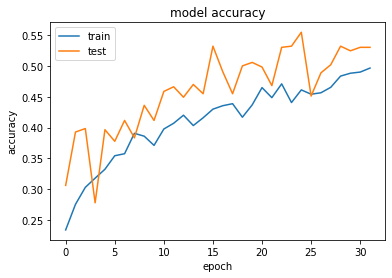

In [24]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

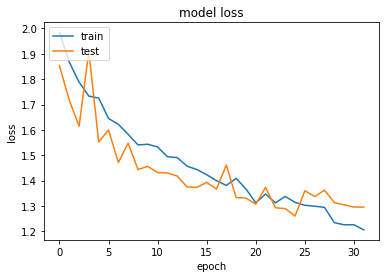

In [25]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
 model.predict_generator(test_batches, steps=3,verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
3/3 [==============================] - 14s 5s/step


array([[1.19380258e-01, 5.54628260e-02, 6.42081127e-02, 2.24957764e-01,
        1.04693793e-01, 2.66935021e-01, 1.06936216e-01, 5.74259721e-02],
       [1.22653544e-01, 6.75269142e-02, 7.43756890e-02, 1.99806258e-01,
        1.16558634e-01, 2.44524822e-01, 1.09161407e-01, 6.53926134e-02],
       [1.21507101e-01, 6.21738732e-02, 6.45613223e-02, 1.86204001e-01,
        1.17704675e-01, 2.92898804e-01, 1.03315316e-01, 5.16349450e-02],
       [1.24020673e-01, 1.07100017e-01, 1.24201953e-01, 1.48587808e-01,
        1.30835965e-01, 1.36266917e-01, 1.12345561e-01, 1.16641045e-01],
       [1.17127888e-01, 7.50444978e-02, 6.17349856e-02, 1.50649071e-01,
        1.38399020e-01, 3.12124580e-01, 9.89005417e-02, 4.60193381e-02],
       [1.25739560e-01, 8.41971338e-02, 9.75726470e-02, 1.81410939e-01,
        1.22964181e-01, 1.84920460e-01, 1.13379799e-01, 8.98152962e-02],
       [1.13870777e-01, 4.52306718e-02, 5.23396693e-02, 2.40598500e-01,
        9.53055695e-02, 3.04705441e-01, 1.01712361e-01, 4.

In [39]:
y_true = test_batches.classes
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7]


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
y_pred1 = np.argmax(y_pred, axis=1)
print(y_pred1)


[5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 4 3 2 4 4 4 3 4 4 4 4 4 3 3 4 2 2
 2 2 2 2 2 2 2 2 2 2 7 2 2 2 3 2 2 2 2 2 2 2 2 7 2 5 2 2 2 2 2 2 2 2 2 2 2
 2 7 2 2 2 2 2 7 2 2 2 4 2 3 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 7 3 2 2
 7 3 2 2 2 2 2 2 3 3 2 2 2 2 2 3 3 5 3 3 3 5 2 3 3 3 4 2 3 3 2 3 7 3 2 3 3
 2 3 3 2 7 3 5 4 2 2 2 2 3 3 7 4 2 2 3 2 3 3 4 5 2 2 4 4 4 4 5 4 4 5 5 4 5
 3 5 4 4 2 4 4 4 4 3 5 5 3 4 4 4 5 4 4 5 5 5 5 5 2 5 4 5 5 5 5 2 5 4 5 5 4
 4 5 5 5 2 3 3 2 5 5 5 4 5 5 2 5 2 3 7 3 7 7 2 2 2 7 2 2 2 7 7 2 2 7 2 7 2
 3 2 2 7 7 7 2 7 2 2 2 2 7 2 2 2 7 2 2 2 2 2 7 2 2 7 2 2 7 2 2 2 2 2 2 7 7
 2 7 2 2 7 7]


In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix 
import itertools
import matplotlib.pyplot as plt

In [0]:
cm = confusion_matrix(y_true, y_pred1)

In [42]:
import sklearn.metrics as metrics
class_labels = list(test_batches.class_indices.keys()) 
report = metrics.classification_report(y_true, y_pred1, target_names=class_labels)
print(report)

                                precision    recall  f1-score   support

        Robusta Cherry (Black)       0.00      0.00      0.00        19
       Robusta cherry (Broken)       0.00      0.00      0.00        16
       Robusta Cherry (Brown )       0.55      0.84      0.67        91
 Robusta Cherry (old or past )       0.52      0.46      0.49        48
       Robusta Cherry (Shells)       0.47      0.60      0.53        30
Robusta Cherry(Foreign Matter)       0.30      0.73      0.43        22
 Robusta Cherry(Insect damage)       0.00      0.00      0.00        12
       Robustry cherry (Green)       0.69      0.34      0.46        64

                      accuracy                           0.51       302
                     macro avg       0.32      0.37      0.32       302
                  weighted avg       0.47      0.51      0.46       302



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                precision    recall  f1-score   support

        Robusta Cherry (Black)       0.00      0.00      0.00        19
       Robusta cherry (Broken)       0.00      0.00      0.00        16
       Robusta Cherry (Brown )       0.55      0.84      0.67        91
 Robusta Cherry (old or past )       0.52      0.46      0.49        48
       Robusta Cherry (Shells)       0.47      0.60      0.53        30
Robusta Cherry(Foreign Matter)       0.30      0.73      0.43        22
 Robusta Cherry(Insect damage)       0.00      0.00      0.00        12
       Robustry cherry (Green)       0.69      0.34      0.46        64

                      accuracy                           0.51       302
                     macro avg       0.32      0.37      0.32       302
                  weighted avg       0.47      0.51      0.46       302



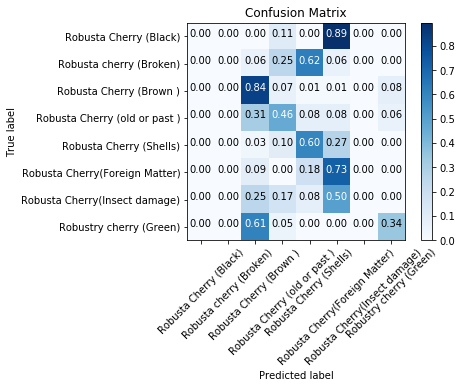

In [49]:
plot_confusion_matrix(cm , class_list ,  title='Confusion Matrix')

print(report)

In [0]:
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [0]:
%matplotlib inline
from sklearn.metrics import confusion_matrix 
import itertools
import matplotlib.pyplot as plt

In [0]:
cm = confusion_matrix(y_true, predicted_classes)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14  0]
 [ 0 14]]


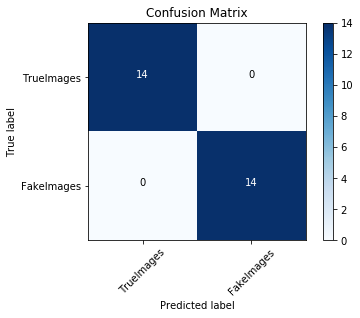

In [0]:
cm_plot_labels=['TrueImages','FakeImages']
plot_confusion_matrix(cm , cm_plot_labels ,  title='Confusion Matrix')

In [0]:
pip install flask

In [0]:
from flask import Flask, render_template,request


In [0]:
pip install scipy

In [0]:
from scipy.misc import *